In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#Задача кластеризации
#Необходимо выделить некоторые группы клиентов, которые можно будет интерпретировать нужным нам образом

In [2]:
df = pd.read_csv('../DATA/bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
#Посмотрим на непрерывные признаки

<Axes: xlabel='age', ylabel='Count'>

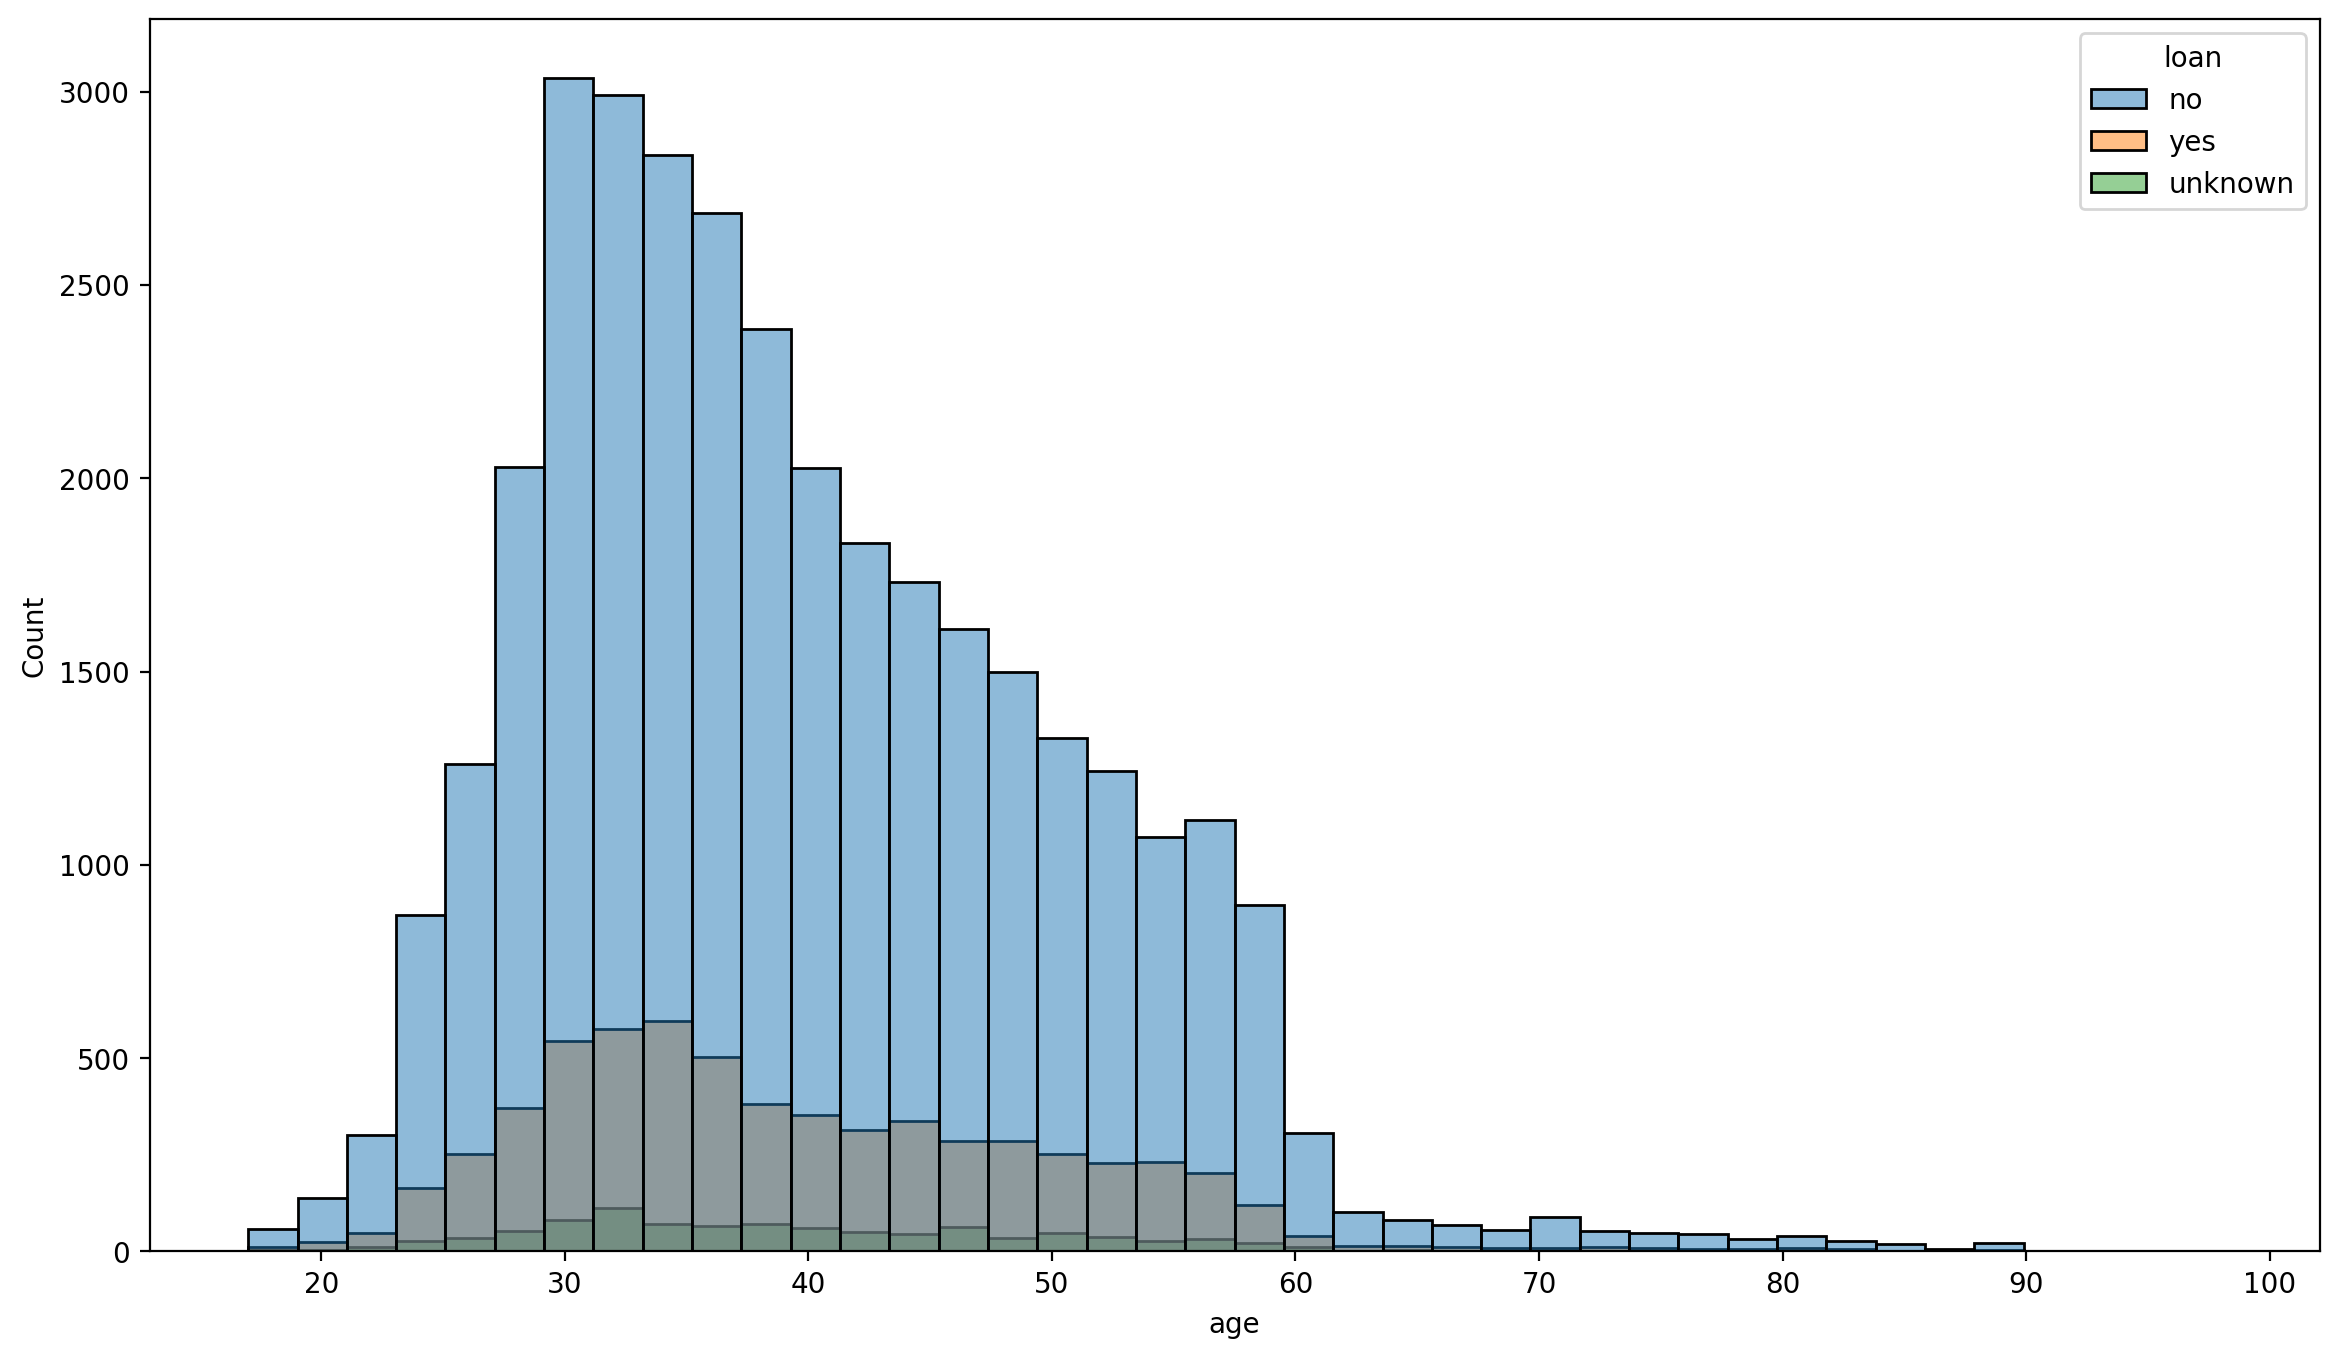

In [15]:
plt.figure(figsize=(14, 8), dpi=200)
sns.histplot(data=df, x='age', bins=40, hue='loan')
#Можно предположить, что нам нужно найти клиентов, которым можно отправить предложение о взятии кредита
#Тогда вполне логично, что предложения можно отправлять тем, у кого нет кредита. С другой стороны можно отправлять тем, кто уже
#пользуется услугами банка

<Axes: xlabel='pdays', ylabel='Count'>

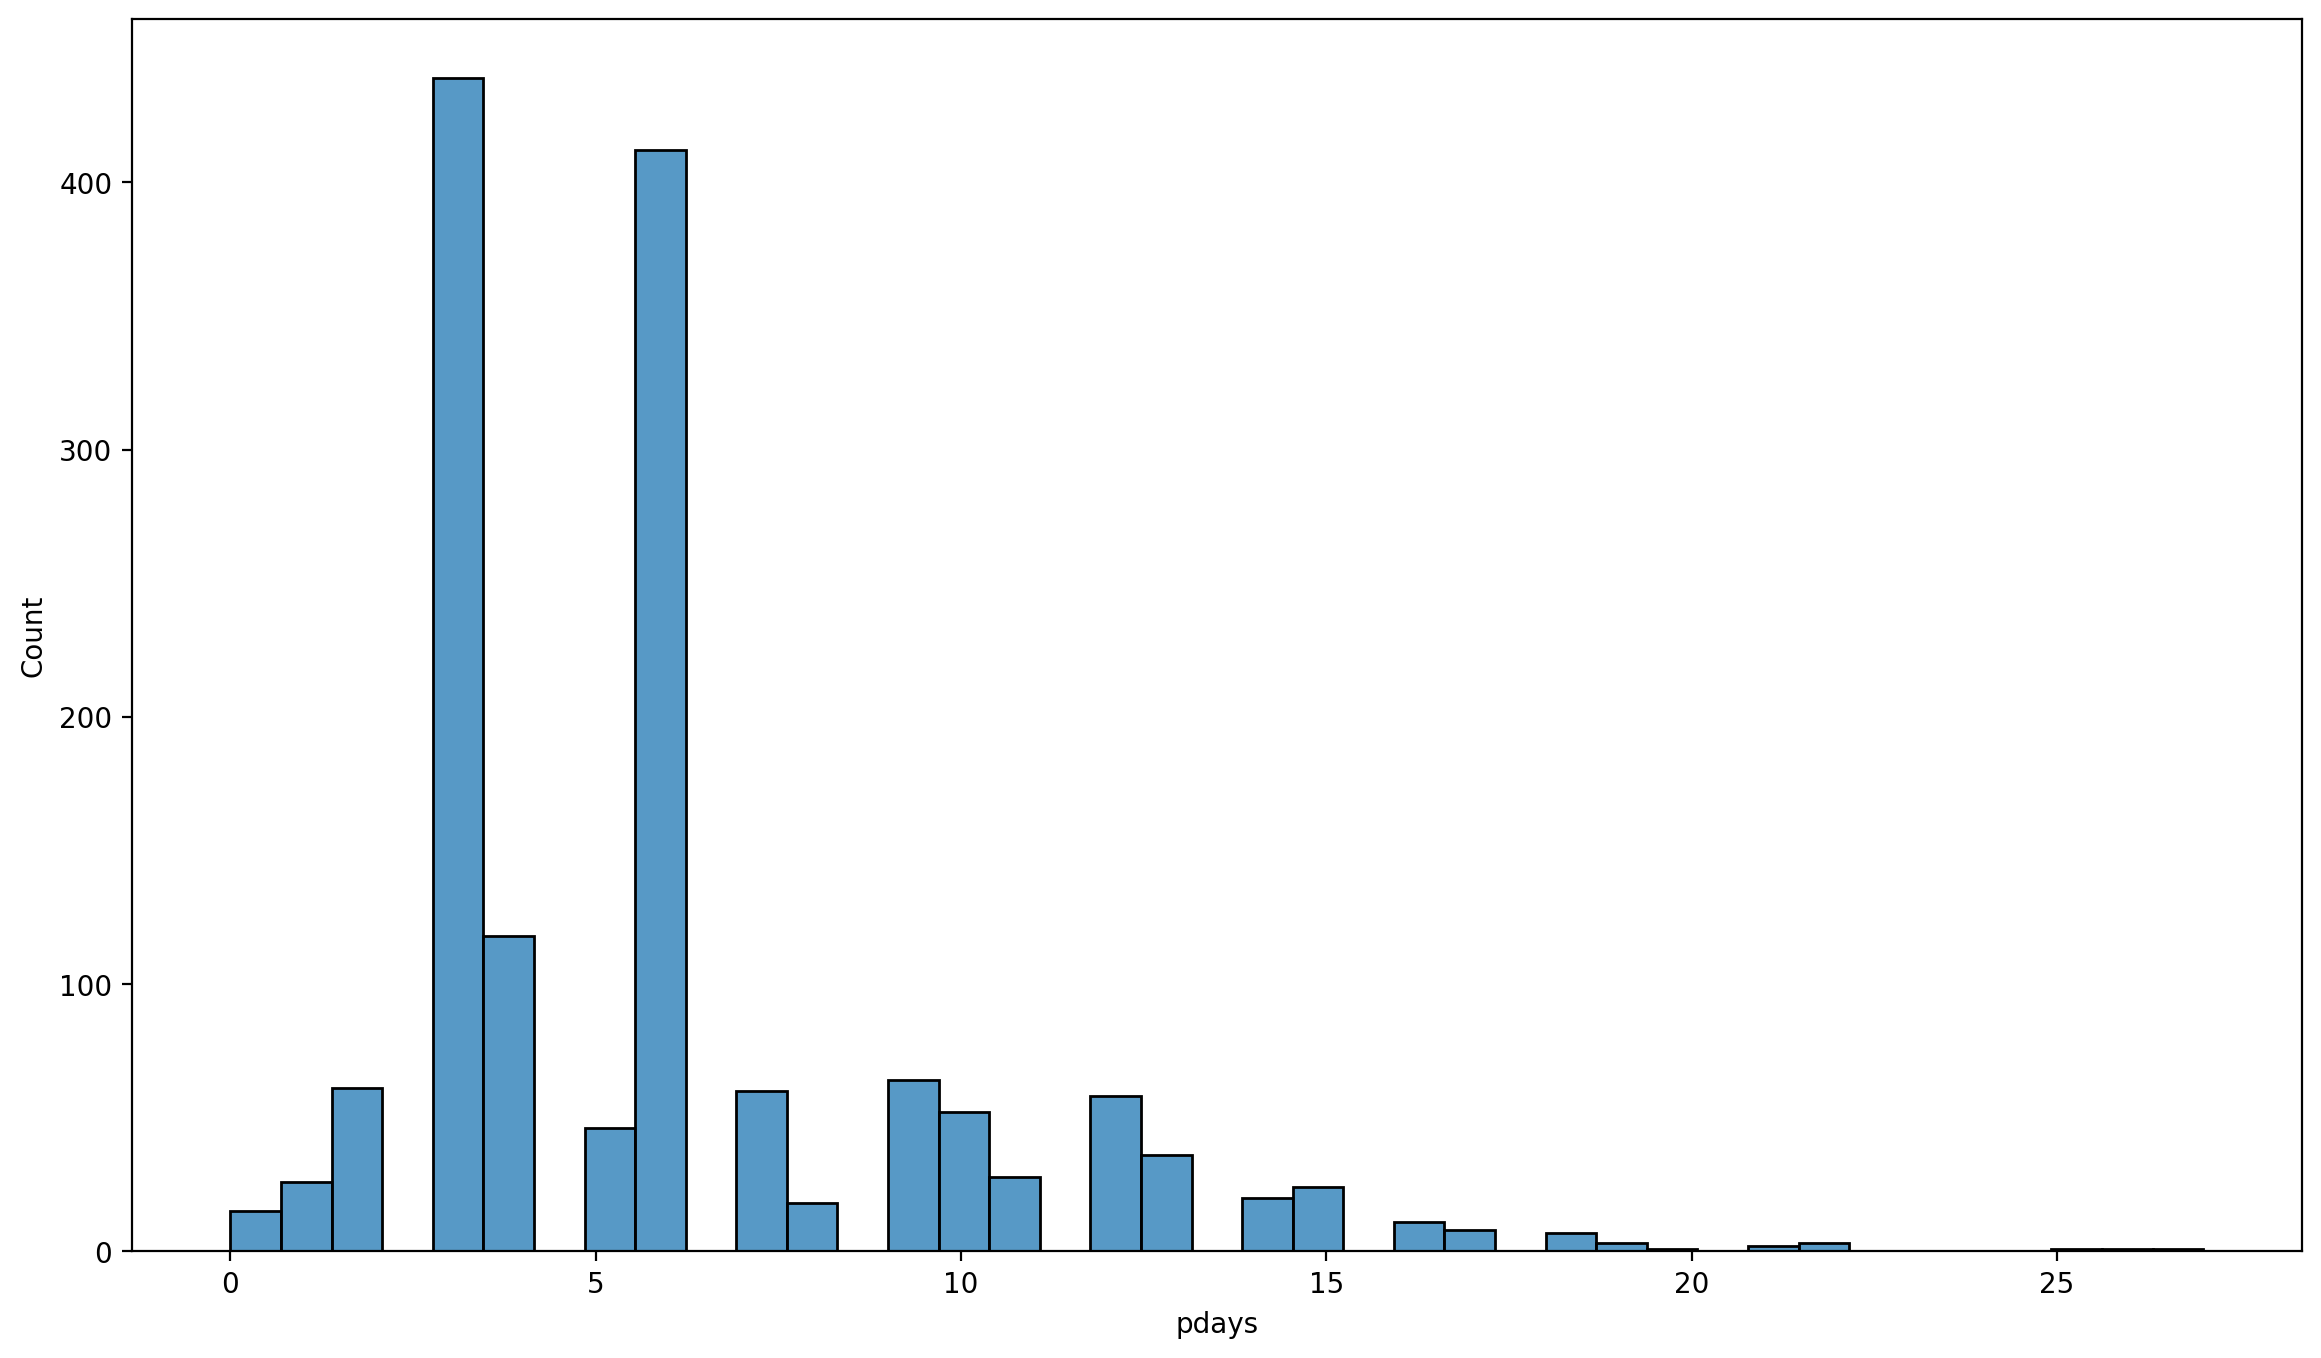

In [19]:
#pdays - кол-во дней с последнего контакта с клиентом. pdays = 999 означает, что контактов не было раньше
plt.figure(figsize=(14, 8), dpi=200)
sns.histplot(data=df[df['pdays']!=999], x='pdays')

In [20]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

(0.0, 1000.0)

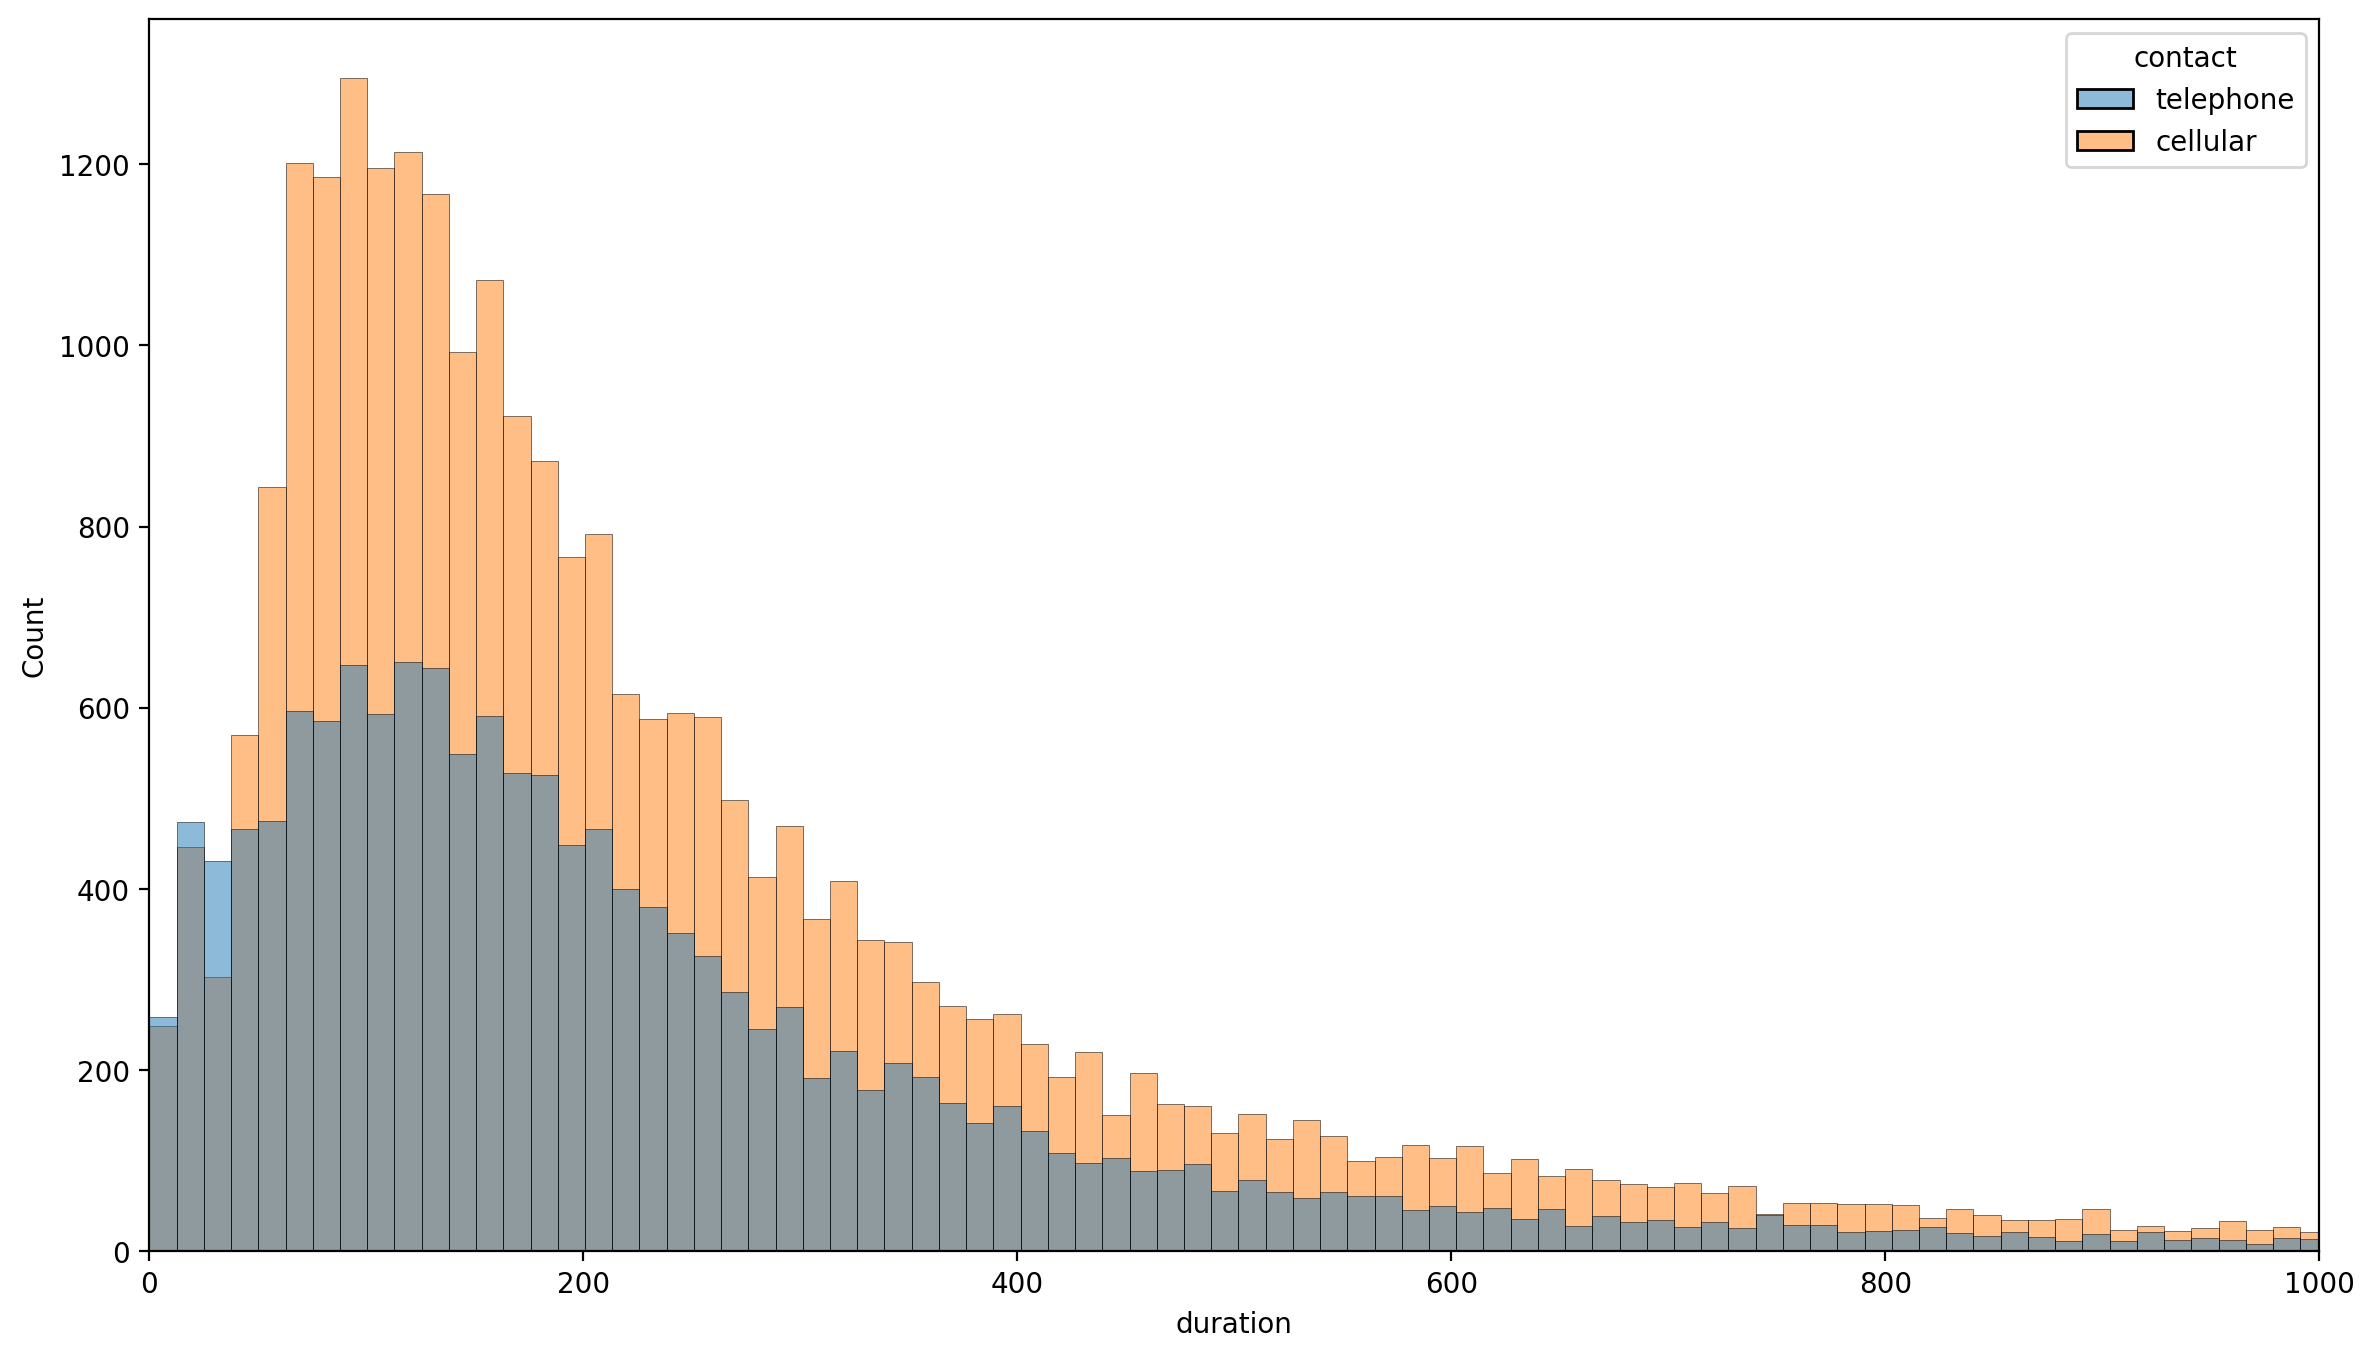

In [25]:
#duration - продолжительность разговора
plt.figure(figsize=(14, 8), dpi=200)
sns.histplot(data=df, x='duration', hue='contact')
plt.xlim((0,1000))

In [26]:
#Посмотрим на категориальные признаки

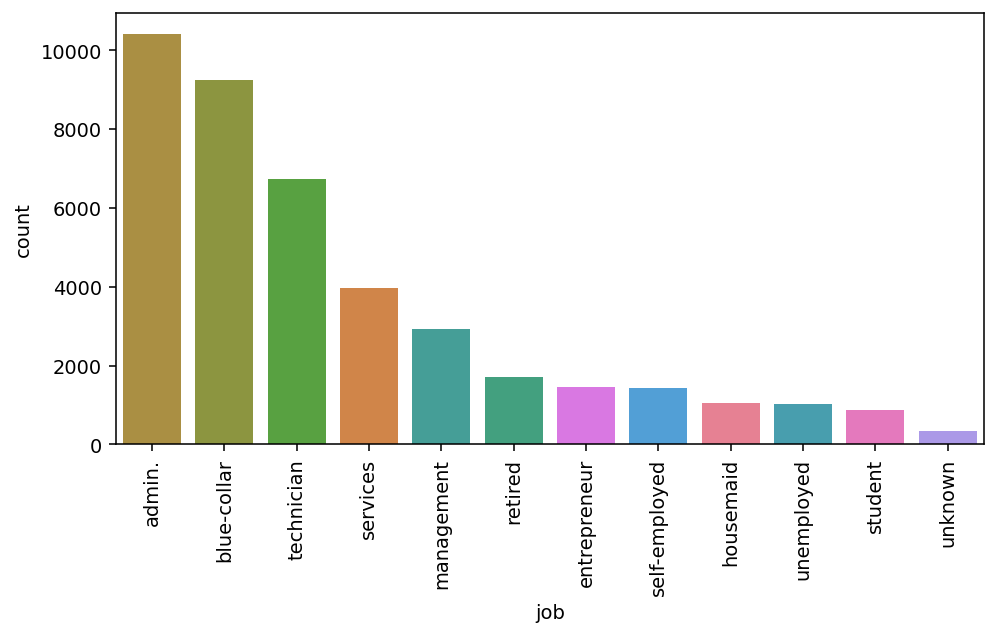

In [35]:
plt.figure(figsize=(8,4), dpi=140)
sns.countplot(data=df, x='job', hue='job', order=df['job'].value_counts().index)
plt.xticks(rotation=90);

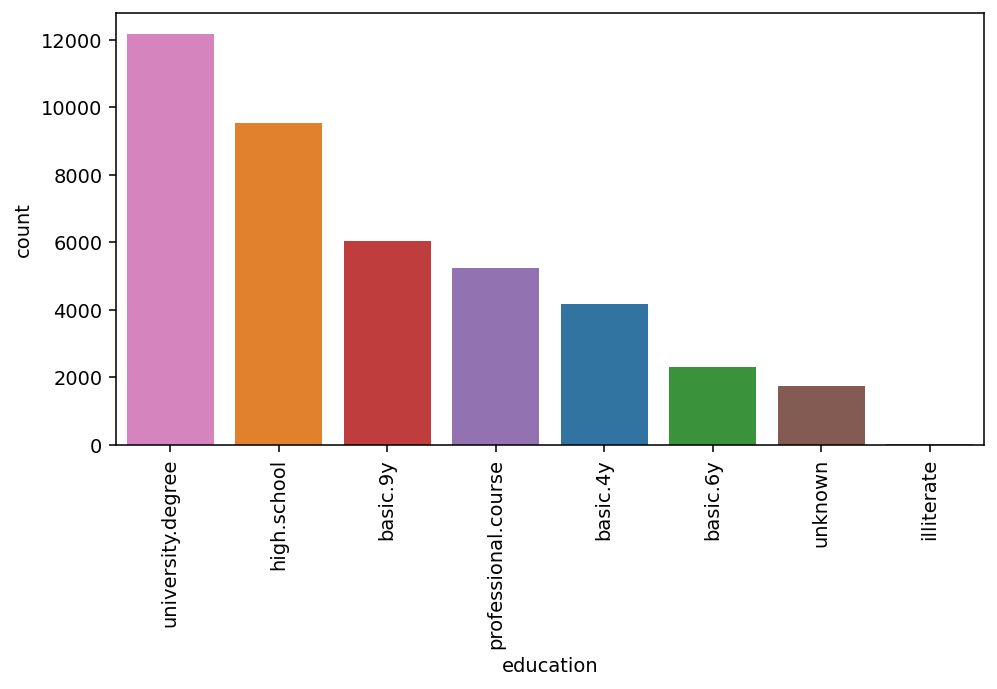

In [36]:
plt.figure(figsize=(8,4), dpi=140)
sns.countplot(data=df, x='education', hue='education', order=df['education'].value_counts().index)
plt.xticks(rotation=90);

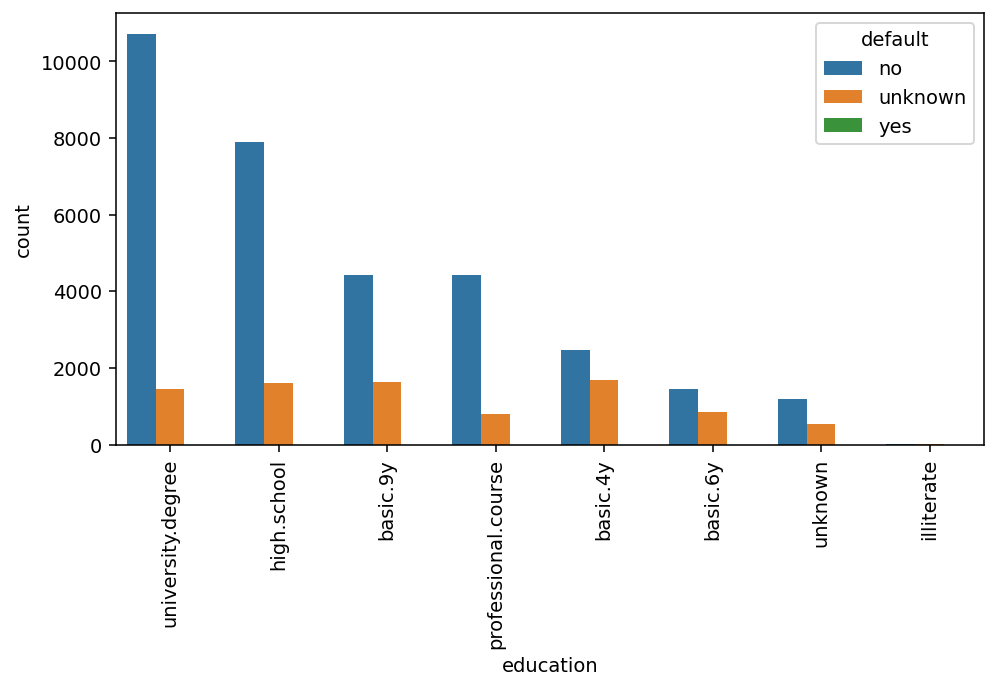

In [38]:
#default - были ли просрочки по кредиту
plt.figure(figsize=(8,4), dpi=140)
sns.countplot(data=df, x='education', hue='default', order=df['education'].value_counts().index)
plt.xticks(rotation=90);

In [ ]:
#Получим кластеры объектов

In [3]:
X = pd.get_dummies(df)

In [40]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False


In [4]:
scaler = StandardScaler()

In [5]:
scaled_X = scaler.fit_transform(X)

In [6]:
model = KMeans(n_clusters=2) #2 кластера т.к. мы хотим разделить клиентов на тех, кому будем отправлять 
                             #предложение о кредите, а кому не будем

In [7]:
cluster_labels = model.fit_predict(scaled_X) #Вычисляет центры кластеров и возвращает значения кластеров для точек

In [8]:
X['Cluster'] = cluster_labels

<Axes: >

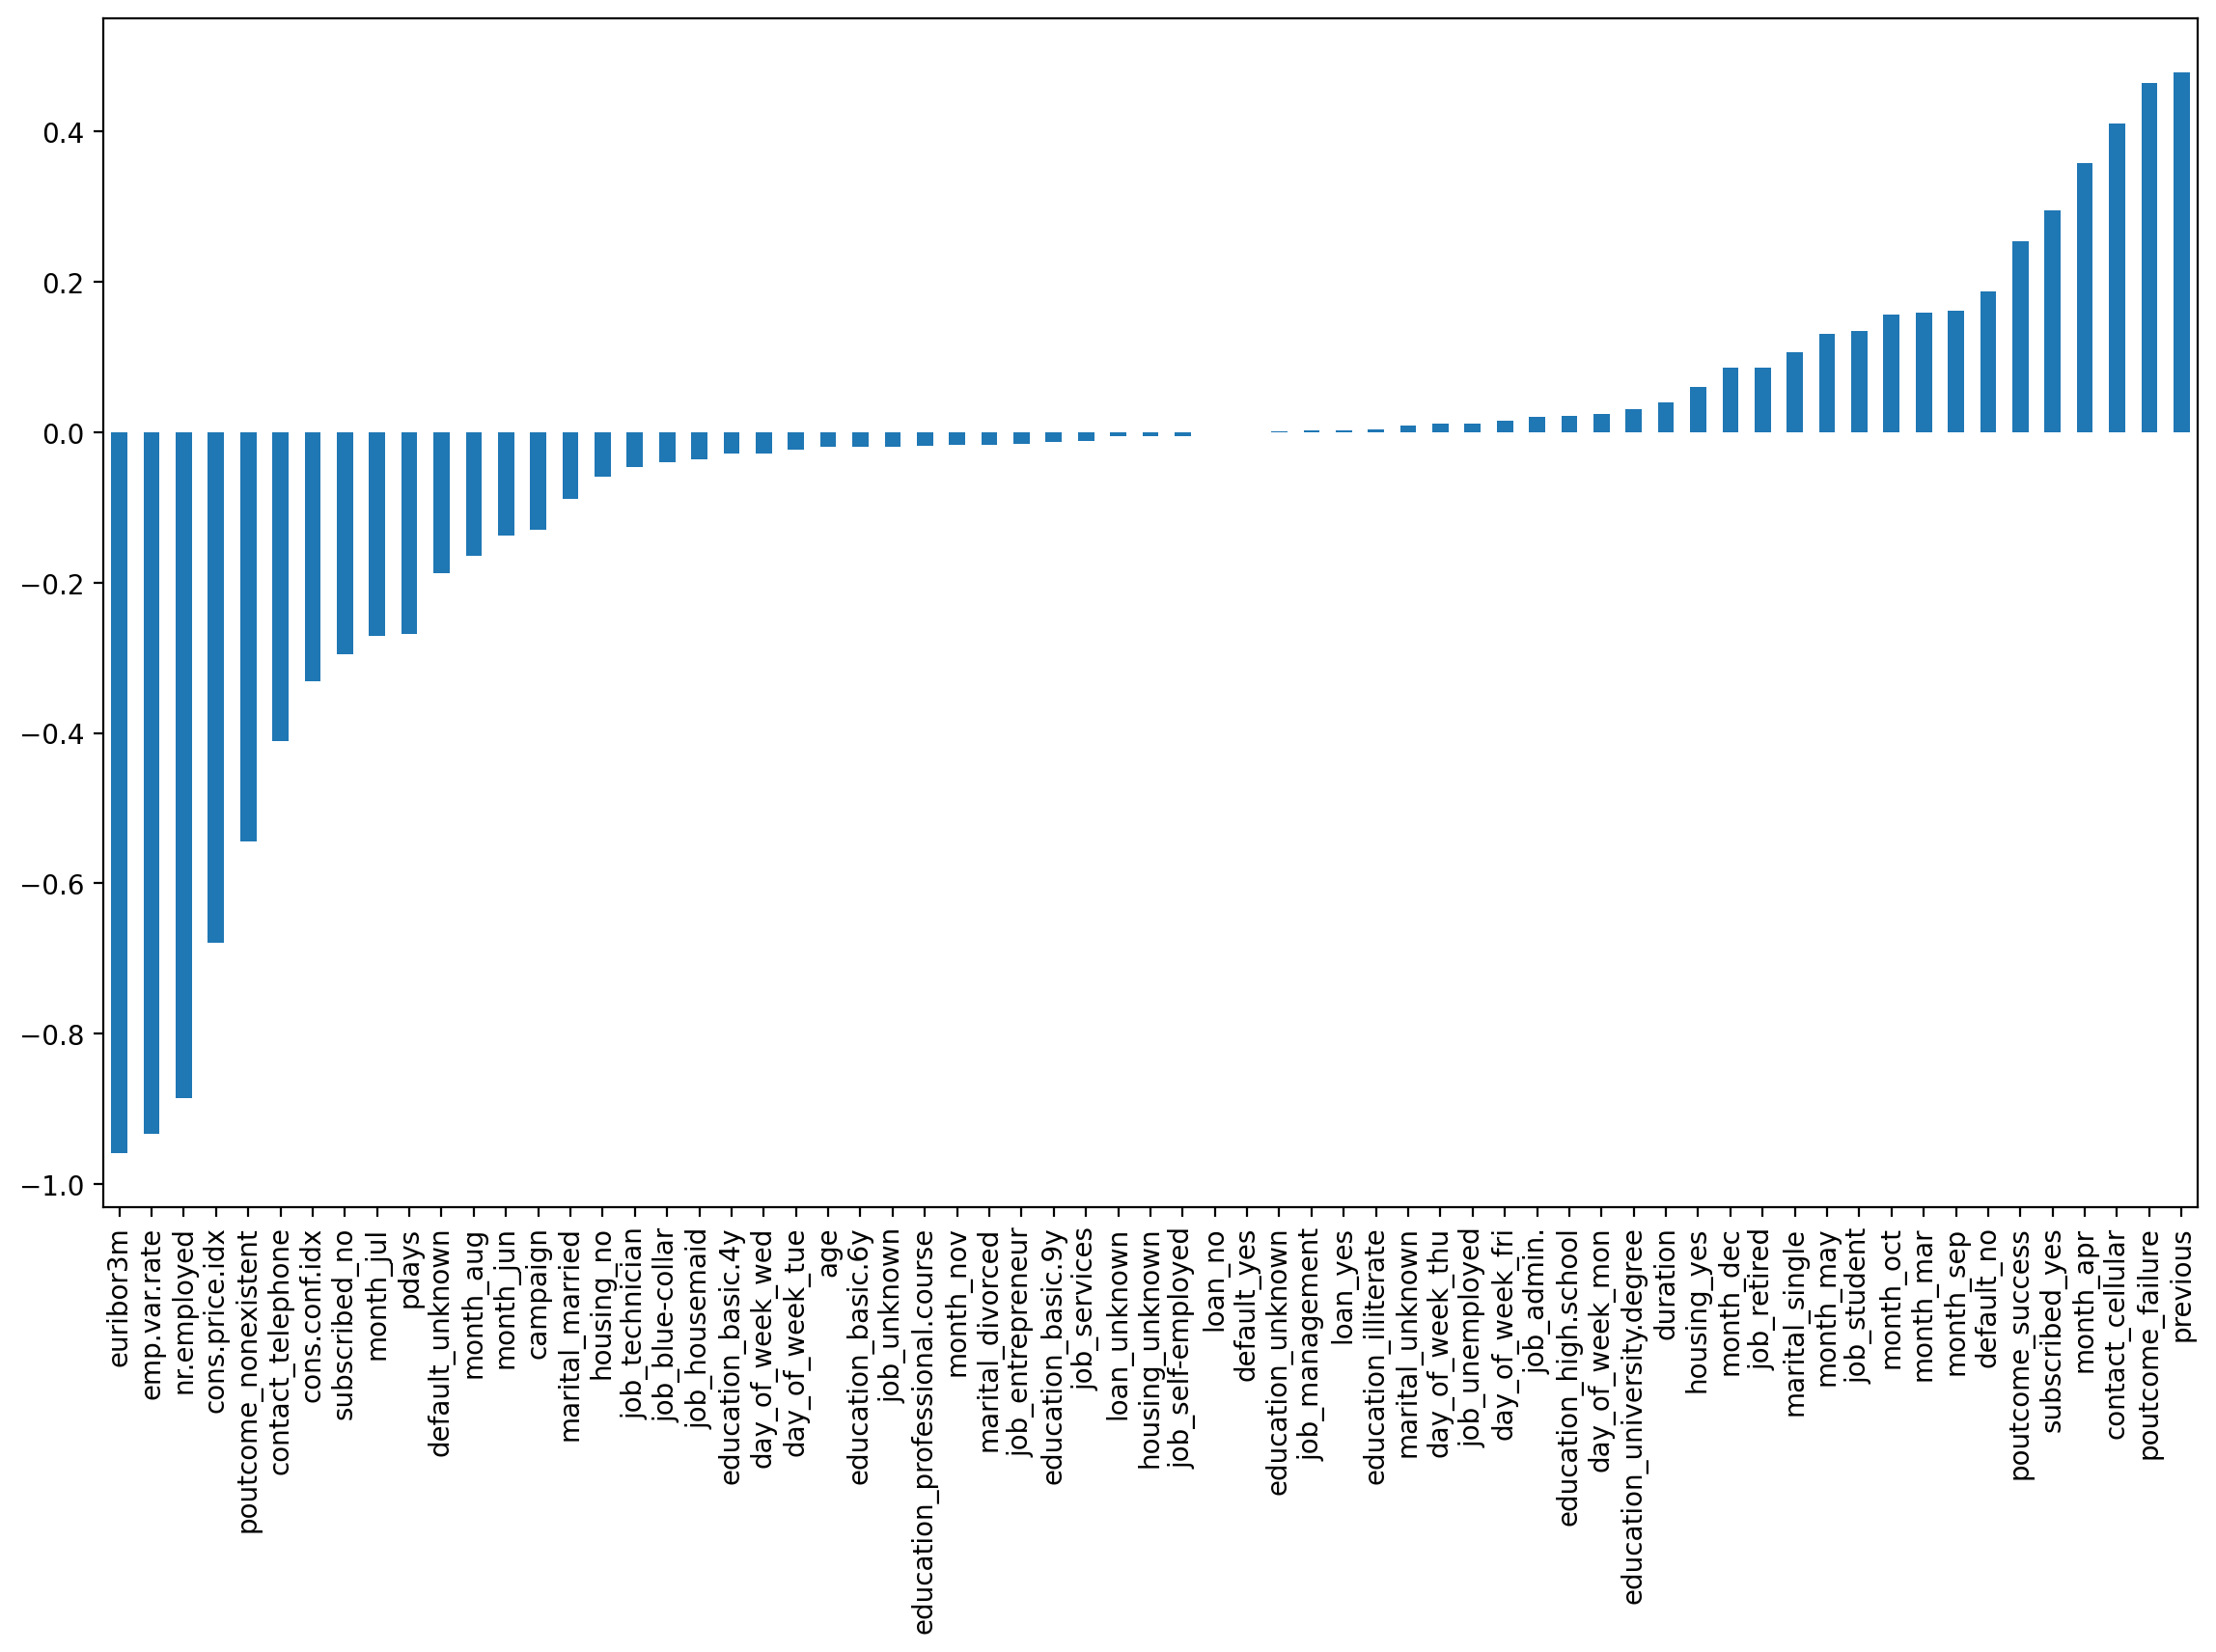

In [9]:
plt.figure(figsize=(14,8), dpi=200)
X.corr()['Cluster'].sort_values().iloc[:-1].plot(kind='bar')

In [ ]:
#Выбор кол-ва кластеров K

In [10]:
ssd = []
for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_) #Сумма квадратов расстояний от точек до центров кластеров

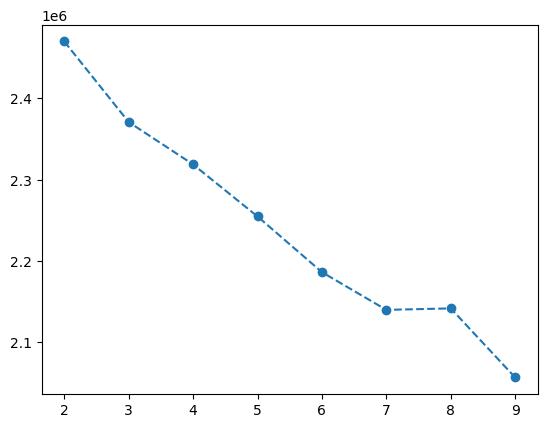

In [12]:
plt.plot(range(2,10), ssd, 'o--') #Переход от 7 к 8 пологий, так что можно взять K=7

In [15]:
sil = []
for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    sil.append(silhouette_score(scaled_X, model.labels_)) #model.labels_ - значения кластеров

In [16]:
sil #К сожалению имеем малые значения метрики, что означает плохой выбор кластеров при любом K

[0.11699454625827192,
 0.044330498370023834,
 0.05865346195323693,
 0.03606880033623786,
 0.06263560033047098,
 0.06723890101577767,
 0.042484510680120866,
 0.05446722531165615]